In [1]:
!pip install -q datasets pytorch-lightning segmentation-models-pytorch albumentations timm
!pip install -q datasets pytorch-lightning albumentations timm
!mkdir -p checkpoints

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
from albumentations import Compose, Resize, Normalize
from albumentations.pytorch import ToTensorV2
import cv2
from sklearn.metrics import f1_score, precision_score, recall_score
import timm
import warnings
from pytorch_lightning.callbacks import LearningRateMonitor

INFO:lightning_fabric.utilities.seed:Seed set to 42


데이터셋 로드 중...
데이터셋 로드 완료!
데이터셋 구조:
DatasetDict({
    train: Dataset({
        features: ['file_name', 'image', 'id', 'category_id', 'bbox', 'segmentation', 'area', 'iscrowd', 'height', 'width', 'date_captured', 'license'],
        num_rows: 1502
    })
    test: Dataset({
        features: ['file_name', 'image', 'id', 'category_id', 'bbox', 'segmentation', 'area', 'iscrowd', 'height', 'width', 'date_captured', 'license'],
        num_rows: 215
    })
    valid: Dataset({
        features: ['file_name', 'image', 'id', 'category_id', 'bbox', 'segmentation', 'area', 'iscrowd', 'height', 'width', 'date_captured', 'license'],
        num_rows: 429
    })
})
뇌종양 세그멘테이션 - HRNet-W30-C (F1 Score 최적화)
PyTorch 버전: 2.6.0+cu124
CUDA 사용 가능: True
CUDA 디바이스 이름: Tesla T4
데이터 로더 생성 완료! 훈련 샘플 수: 1502
HRNet-W30-C 모델 생성 중...


INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


모델 생성 완료!
모델 훈련 시작...


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                      | Params | Mode 
------------------------------------------------------------------------
0 | criterion         | CombinedLoss              | 0      | train
1 | backbone          | HighResolutionNetFeatures | 27.4 M | train
2 | segmentation_head | Sequential                | 2.7 M  | train
------------------------------------------------------------------------
30.0 M    Trainable params
0         Non-trainable params
30.0 M    Total params
120.068   Total estimated model params size (MB)
1527      Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved. New best score: 0.625


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.038 >= min_delta = 0.0. New best score: 0.663


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.041 >= min_delta = 0.0. New best score: 0.704


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.023 >= min_delta = 0.0. New best score: 0.727


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.002 >= min_delta = 0.0. New best score: 0.729


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.013 >= min_delta = 0.0. New best score: 0.742


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.014 >= min_delta = 0.0. New best score: 0.756


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.011 >= min_delta = 0.0. New best score: 0.767


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.002 >= min_delta = 0.0. New best score: 0.769


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.002 >= min_delta = 0.0. New best score: 0.771


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.001 >= min_delta = 0.0. New best score: 0.772


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.020 >= min_delta = 0.0. New best score: 0.791


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.004 >= min_delta = 0.0. New best score: 0.795


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.003 >= min_delta = 0.0. New best score: 0.798


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.004 >= min_delta = 0.0. New best score: 0.802


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.001 >= min_delta = 0.0. New best score: 0.803


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.001 >= min_delta = 0.0. New best score: 0.804


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_f1 improved by 0.000 >= min_delta = 0.0. New best score: 0.804


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


훈련 완료!
최고 검증 F1 스코어: 0.9300
모델 테스트 중...


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          test_f1          │    0.7872951626777649     │
│         test_iou          │    0.6444336175918579     │
│      test_precision       │    0.8232848644256592     │
│        test_recall        │    0.7655732035636902     │
└───────────────────────────┴───────────────────────────┘

테스트 결과: [{'test_f1': 0.7872951626777649, 'test_precision': 0.8232848644256592, 'test_recall': 0.7655732035636902, 'test_iou': 0.6444336175918579}]
최적의 임계값: 0.30
F1 스코어: 0.8068, 정밀도: 0.8104, 재현율: 0.8032


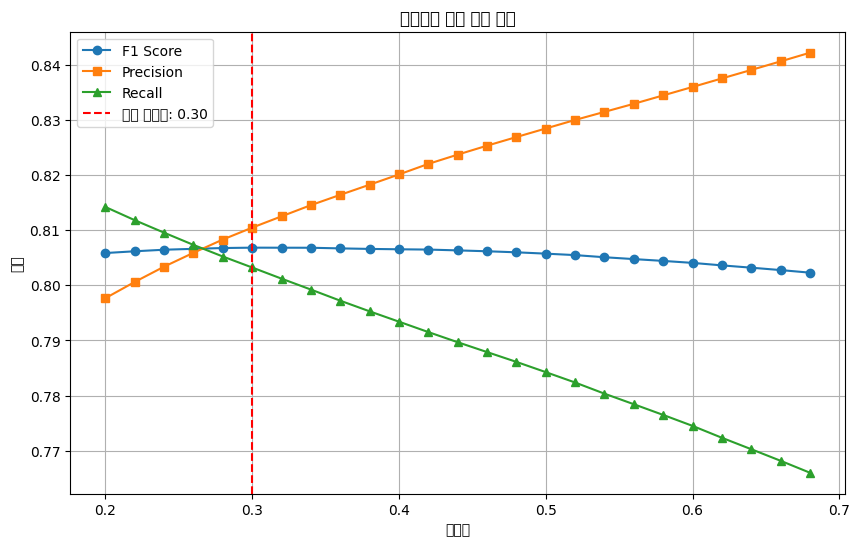

모델 저장 완료: hrnet_w30_brain_tumor_f1_optimized.pth
예측 결과 시각화 중...


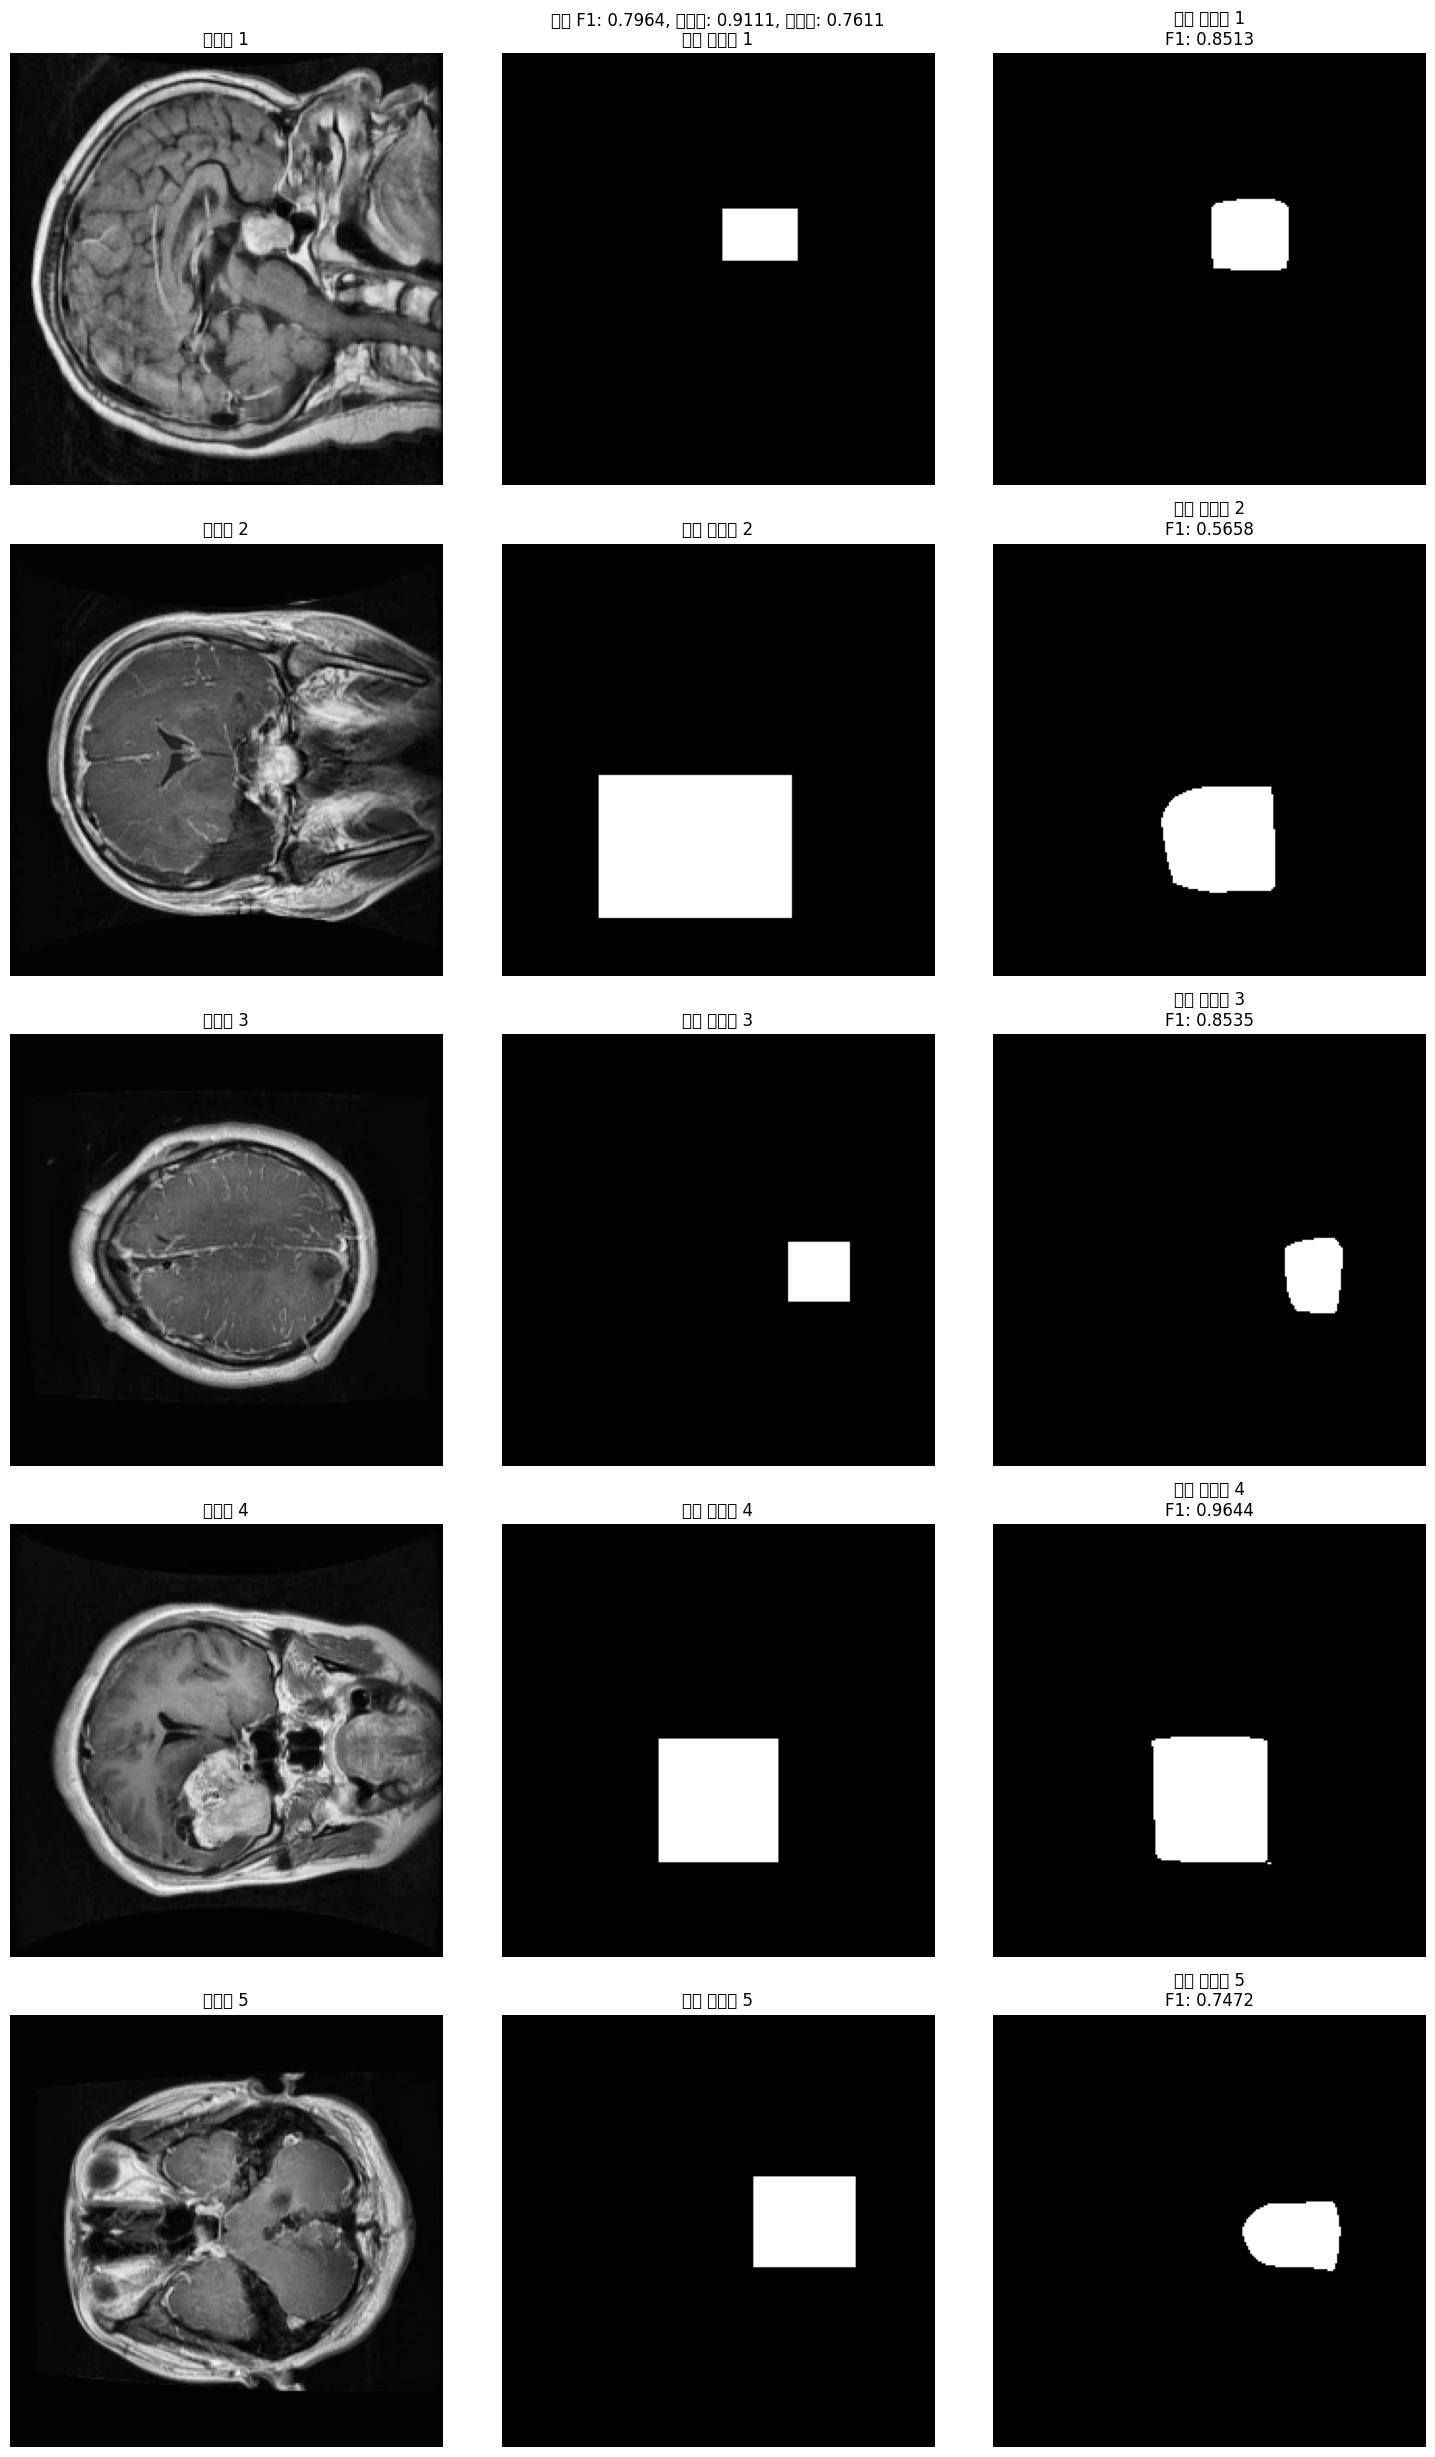

테스트 세트의 평균 F1 스코어: 0.7964
테스트 세트의 평균 정밀도: 0.9111
테스트 세트의 평균 재현율: 0.7611
TTA 적용한 예측 결과 시각화 중...
TTA 적용 테스트 세트의 평균 F1 스코어: 0.7250
TTA 적용 테스트 세트의 평균 정밀도: 0.7187
TTA 적용 테스트 세트의 평균 재현율: 0.8146
완료!


In [7]:
# HRNet-W30-C 뇌종양 세그멘테이션 모델 (F1 Score 최적화)
# 필요한 라이브러리 설치



warnings.filterwarnings('ignore')

# 랜덤 시드 설정
pl.seed_everything(42)

# 데이터셋 로드
print("데이터셋 로드 중...")
dataset = load_dataset("dwb2023/brain-tumor-image-dataset-semantic-segmentation")
print("데이터셋 로드 완료!")

# 데이터셋 구조 확인
print("데이터셋 구조:")
print(dataset)

# 데이터 전처리 및 증강
class BrainTumorDataset(Dataset):
    def __init__(self, hf_dataset, split='train', img_size=224):
        self.dataset = hf_dataset[split]
        self.img_size = img_size
        self.split = split
        self.transform = self.get_transforms(split)

    def get_transforms(self, split):
        # 기본 전처리만 적용
        return Compose([
            Resize(self.img_size, self.img_size),
            Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2(),
        ])

    def create_mask_from_segmentation(self, segmentation, height, width):
        # segmentation (다각형 좌표)에서 마스크 생성
        mask = np.zeros((height, width), dtype=np.float32)

        if segmentation and isinstance(segmentation, list):
            for polygon in segmentation:
                if len(polygon) > 4:  # 최소 3개의 좌표(x,y) 쌍이 필요
                    # [x1, y1, x2, y2, ...] 형식을 (N, 2) 형식으로 변환
                    points = np.array(polygon).reshape(-1, 2).astype(np.int32)
                    cv2.fillPoly(mask, [points], 1)

        return mask

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = np.array(item['image'])
        height, width = image.shape[:2]

        # segmentation에서 마스크 생성
        mask = self.create_mask_from_segmentation(item['segmentation'], height, width)

        # 이미지 및 마스크 전처리
        transformed = self.transform(image=image, mask=mask)
        image = transformed['image']
        mask = transformed['mask'].unsqueeze(0)  # 채널 차원 추가 [1, H, W]

        return image, mask

# 데이터 로더 생성
def create_dataloaders(dataset, batch_size=8):
    train_dataset = BrainTumorDataset(dataset, 'train')
    val_dataset = BrainTumorDataset(dataset, 'valid')
    test_dataset = BrainTumorDataset(dataset, 'test')

    # num_workers 증가 및 핀 메모리 활성화
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                             num_workers=4, pin_memory=True, persistent_workers=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                           num_workers=4, pin_memory=True, persistent_workers=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                            num_workers=4, pin_memory=True, persistent_workers=True)

    return train_loader, val_loader, test_loader

# Dice 손실 함수 정의
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = torch.sigmoid(y_pred)

        # 분자 (intersection)
        intersection = torch.sum(y_true * y_pred)

        # 분모 (union)
        union = torch.sum(y_true) + torch.sum(y_pred)

        # Dice 계수
        dice = (2.0 * intersection + self.smooth) / (union + self.smooth)

        return 1.0 - dice  # 최소화를 위해 1에서 빼기

# F1 손실 함수
class F1Loss(nn.Module):
    def __init__(self, epsilon=1e-7):
        super(F1Loss, self).__init__()
        self.epsilon = epsilon

    def forward(self, y_pred, y_true):
        y_pred = torch.sigmoid(y_pred)

        tp = torch.sum(y_true * y_pred)
        fp = torch.sum((1 - y_true) * y_pred)
        fn = torch.sum(y_true * (1 - y_pred))

        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)

        f1 = 2 * precision * recall / (precision + recall + self.epsilon)

        return 1 - f1  # 최소화를 위해 1에서 빼기

# 조합 손실 함수
class CombinedLoss(nn.Module):
    def __init__(self, weights=(0.6, 0.4), smooth=1.0, alpha=0.7, beta=0.3):
        super(CombinedLoss, self).__init__()
        self.dice_loss = DiceLoss(smooth=smooth)
        self.f1_loss = F1Loss()
        self.weights = weights
        self.alpha = alpha
        self.beta = beta
        self.focal_loss = FocalLoss(alpha=self.alpha, beta=self.beta)

    def forward(self, y_pred, y_true):
        dice = self.dice_loss(y_pred, y_true)
        f1 = self.f1_loss(y_pred, y_true)
        focal = self.focal_loss(y_pred, y_true)

        return self.weights[0] * dice + self.weights[1] * (f1 + focal)

# 포컬 손실 추가 (클래스 불균형 처리에 도움)
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.7, beta=0.3, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def forward(self, y_pred, y_true):
        y_pred = torch.sigmoid(y_pred)

        # 포지티브 샘플에 대한 포컬 손실
        pos_loss = -self.alpha * (1 - y_pred) ** self.gamma * y_true * torch.log(y_pred + 1e-7)

        # 네거티브 샘플에 대한 포컬 손실
        neg_loss = -self.beta * y_pred ** self.gamma * (1 - y_true) * torch.log(1 - y_pred + 1e-7)

        loss = pos_loss + neg_loss
        return loss.mean()

# 세그멘테이션 헤드 정의
class SegmentationHead(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SegmentationHead, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

# HRNet-W30-C 세그멘테이션 모델
class HRNetW30Segmentation(pl.LightningModule):
    def __init__(self, num_classes=1, lr=0.0005, weight_decay=1e-4):
        super().__init__()
        self.save_hyperparameters()
        self.num_classes = num_classes
        self.lr = lr
        self.weight_decay = weight_decay

        # 향상된 손실 함수 가중치
        self.criterion = CombinedLoss(weights=(0.6, 0.4))

        # 성능 메트릭 저장
        self.best_val_f1 = 0.0

        # HRNet-W30-C 백본 로드
        self.backbone = timm.create_model(
            'hrnet_w30',
            pretrained=True,
            features_only=True
        )

        # 마지막 특성 맵의 채널 수
        last_channels = self.backbone.feature_info[-1]['num_chs']

        # 향상된 세그멘테이션 헤드 (더 복잡한 구조로 변경)
        self.segmentation_head = nn.Sequential(
            nn.Conv2d(last_channels, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, num_classes, kernel_size=1)
        )

    def forward(self, x):
        # 입력 크기 저장
        input_size = x.shape[2:]

        # 백본으로 특성 추출
        features = self.backbone(x)

        # 마지막 특성 맵 사용
        last_feature = features[-1]

        # 세그멘테이션 헤드 통과
        logits = self.segmentation_head(last_feature)

        # 원래 이미지 크기로 업샘플링
        if logits.shape[2:] != input_size:
            logits = F.interpolate(logits, size=input_size, mode='bilinear', align_corners=False)

        return logits

    def training_step(self, batch, batch_idx):
        images, masks = batch
        predictions = self(images)
        loss = self.criterion(predictions, masks)

        # F1 스코어 계산
        pred_masks = (torch.sigmoid(predictions) > 0.5).float()
        f1 = self.calculate_f1_score(pred_masks, masks)
        precision = self.calculate_precision(pred_masks, masks)
        recall = self.calculate_recall(pred_masks, masks)

        # 로깅
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_f1', f1, prog_bar=True)
        self.log('train_precision', precision, prog_bar=False)
        self.log('train_recall', recall, prog_bar=False)

        return loss

    def validation_step(self, batch, batch_idx):
        images, masks = batch
        predictions = self(images)
        loss = self.criterion(predictions, masks)

        # F1 스코어 계산
        pred_masks = (torch.sigmoid(predictions) > 0.5).float()
        f1 = self.calculate_f1_score(pred_masks, masks)
        precision = self.calculate_precision(pred_masks, masks)
        recall = self.calculate_recall(pred_masks, masks)
        iou = self.calculate_iou(pred_masks, masks)

        # 로깅
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_f1', f1, prog_bar=True)
        self.log('val_precision', precision, prog_bar=True)
        self.log('val_recall', recall, prog_bar=True)
        self.log('val_iou', iou, prog_bar=False)

        # 최고 F1 스코어 업데이트
        if f1 > self.best_val_f1:
            self.best_val_f1 = f1

        return {'val_loss': loss, 'val_f1': f1}

    def test_step(self, batch, batch_idx):
        images, masks = batch
        predictions = self(images)

        # F1 스코어 계산
        pred_masks = (torch.sigmoid(predictions) > 0.5).float()
        f1 = self.calculate_f1_score(pred_masks, masks)
        precision = self.calculate_precision(pred_masks, masks)
        recall = self.calculate_recall(pred_masks, masks)
        iou = self.calculate_iou(pred_masks, masks)

        # 로깅
        self.log('test_f1', f1)
        self.log('test_precision', precision)
        self.log('test_recall', recall)
        self.log('test_iou', iou)

        return {'test_f1': f1, 'test_precision': precision, 'test_recall': recall}

    def predict_step(self, batch, batch_idx):
        images, _ = batch
        predictions = self(images)
        pred_masks = (torch.sigmoid(predictions) > 0.5).float()
        return pred_masks

    def calculate_f1_score(self, pred, target):
        # 배치 처리
        pred_flat = pred.view(-1).cpu().detach().numpy()
        target_flat = target.view(-1).cpu().detach().numpy()

        # 예측값이 0.5보다 크면 1, 아니면 0
        pred_binary = (pred_flat > 0.5).astype(np.int32)
        target_binary = (target_flat > 0.5).astype(np.int32)

        # F1 스코어 계산
        f1 = f1_score(target_binary, pred_binary, zero_division=1)
        return torch.tensor(f1)

    def calculate_precision(self, pred, target):
        # 배치 처리
        pred_flat = pred.view(-1).cpu().detach().numpy()
        target_flat = target.view(-1).cpu().detach().numpy()

        # 예측값이 0.5보다 크면 1, 아니면 0
        pred_binary = (pred_flat > 0.5).astype(np.int32)
        target_binary = (target_flat > 0.5).astype(np.int32)

        # 정밀도 계산
        precision = precision_score(target_binary, pred_binary, zero_division=1)
        return torch.tensor(precision)

    def calculate_recall(self, pred, target):
        # 배치 처리
        pred_flat = pred.view(-1).cpu().detach().numpy()
        target_flat = target.view(-1).cpu().detach().numpy()

        # 예측값이 0.5보다 크면 1, 아니면 0
        pred_binary = (pred_flat > 0.5).astype(np.int32)
        target_binary = (target_flat > 0.5).astype(np.int32)

        # 재현율 계산
        recall = recall_score(target_binary, pred_binary, zero_division=1)
        return torch.tensor(recall)

    def calculate_iou(self, pred, target):
        # Intersection over Union 계산
        intersection = (pred * target).sum(dim=(1, 2, 3))
        union = pred.sum(dim=(1, 2, 3)) + target.sum(dim=(1, 2, 3)) - intersection
        iou = (intersection + 1e-6) / (union + 1e-6)
        return iou.mean()

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr,
            weight_decay=self.weight_decay
        )

        # 개선된 스케줄러 전략
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='max', factor=0.75, patience=2, verbose=True, min_lr=1e-6
        )

        return {
            'optimizer': optimizer,
            'lr_scheduler': scheduler,
            'monitor': 'val_f1',
            'interval': 'epoch'
        }

# 최적의 임계값 찾기
def find_optimal_threshold(model, val_loader):
    model.eval()
    device = next(model.parameters()).device

    all_preds = []
    all_masks = []

    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)

            preds = model(images)
            preds = torch.sigmoid(preds)

            all_preds.append(preds.cpu().numpy())
            all_masks.append(masks.cpu().numpy())

    all_preds = np.concatenate([p.flatten() for p in all_preds])
    all_masks = np.concatenate([m.flatten() for m in all_masks])

    # 다양한 임계값에 대한 F1 스코어 계산
    thresholds = np.arange(0.2, 0.7, 0.02)
    f1_scores = []
    precision_scores = []
    recall_scores = []

    for threshold in thresholds:
        pred_binary = (all_preds > threshold).astype(np.int32)
        target_binary = (all_masks > 0.5).astype(np.int32)

        f1 = f1_score(target_binary, pred_binary)
        precision = precision_score(target_binary, pred_binary, zero_division=1)
        recall = recall_score(target_binary, pred_binary, zero_division=1)

        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # 최적의 임계값 찾기
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]
    best_precision = precision_scores[best_idx]
    best_recall = recall_scores[best_idx]

    print(f"최적의 임계값: {best_threshold:.2f}")
    print(f"F1 스코어: {best_f1:.4f}, 정밀도: {best_precision:.4f}, 재현율: {best_recall:.4f}")

    # 임계값 별 F1 스코어 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, 'o-', label='F1 Score')
    plt.plot(thresholds, precision_scores, 's-', label='Precision')
    plt.plot(thresholds, recall_scores, '^-', label='Recall')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'최적 임계값: {best_threshold:.2f}')
    plt.xlabel('임계값')
    plt.ylabel('점수')
    plt.title('임계값에 따른 성능 변화')
    plt.grid(True)
    plt.legend()
    plt.savefig('threshold_performance.png')
    plt.show()

    return best_threshold

# 예측 결과 시각화
def visualize_predictions(model, test_loader, threshold=0.5, num_samples=5):
    model.eval()
    device = next(model.parameters()).device

    plt.figure(figsize=(15, 5 * num_samples))

    metrics = {
        'f1_scores': [],
        'precision_scores': [],
        'recall_scores': []
    }

    for i, (images, masks) in enumerate(test_loader):
        if i >= num_samples:
            break

        images = images.to(device)
        masks = masks.to(device)

        with torch.no_grad():
            predictions = model(images)
            predictions = torch.sigmoid(predictions)
            pred_masks = (predictions > threshold).float()

        # 메트릭 계산
        pred_flat = pred_masks[0].cpu().flatten().numpy()
        mask_flat = masks[0].cpu().flatten().numpy()

        f1 = f1_score(mask_flat, pred_flat, zero_division=1)
        precision = precision_score(mask_flat, pred_flat, zero_division=1)
        recall = recall_score(mask_flat, pred_flat, zero_division=1)

        metrics['f1_scores'].append(f1)
        metrics['precision_scores'].append(precision)
        metrics['recall_scores'].append(recall)

        # CPU로 데이터 이동 및 넘파이 변환
        images = images.cpu().numpy()
        masks = masks.cpu().numpy()
        pred_masks = pred_masks.cpu().numpy()

        # 배치의 첫 번째 이미지만 표시
        image = np.transpose(images[0], (1, 2, 0))
        mask = masks[0, 0]
        pred_mask = pred_masks[0, 0]

        # 정규화 이미지 역변환
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        # 시각화
        plt.subplot(num_samples, 3, i*3 + 1)
        plt.imshow(image)
        plt.title(f'이미지 {i+1}')
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f'실제 마스크 {i+1}')
        plt.axis('off')

        plt.subplot(num_samples, 3, i*3 + 3)
        plt.imshow(pred_mask, cmap='gray')
        plt.title(f'예측 마스크 {i+1}\nF1: {f1:.4f}')
        plt.axis('off')

    # 평균 메트릭 계산
    avg_f1 = np.mean(metrics['f1_scores'])
    avg_precision = np.mean(metrics['precision_scores'])
    avg_recall = np.mean(metrics['recall_scores'])

    plt.suptitle(f'평균 F1: {avg_f1:.4f}, 정밀도: {avg_precision:.4f}, 재현율: {avg_recall:.4f}')
    plt.tight_layout()
    plt.savefig('prediction_results.png')
    plt.show()

    return metrics
# TTA(Test Time Augmentation) 함수 구현
def tta_predict(model, image):
    model.eval()

    # 원본 예측
    with torch.no_grad():
        pred_orig = torch.sigmoid(model(image))

    # 수평 뒤집기
    with torch.no_grad():
        img_flip = torch.flip(image, [3])
        pred_flip = torch.sigmoid(model(img_flip))
        pred_flip = torch.flip(pred_flip, [3])

    # 예측 결과 평균 (원본과 수평 뒤집기만 사용)
    final_pred = (pred_orig + pred_flip) / 2
    return final_pred


# 메인 함수
def main():
    print("뇌종양 세그멘테이션 - HRNet-W30-C (F1 Score 최적화)")
    print("=" * 50)

    # Google Colab 환경 확인
    print(f"PyTorch 버전: {torch.__version__}")
    print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"CUDA 디바이스 이름: {torch.cuda.get_device_name(0)}")

    # PyTorch 병렬 처리 최적화 설정
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False

    # 데이터 로더 생성 (배치 크기 증가)
    batch_size = 8  # 배치 크기 증가
    train_loader, val_loader, test_loader = create_dataloaders(dataset, batch_size)
    print(f"데이터 로더 생성 완료! 훈련 샘플 수: {len(train_loader.dataset)}")

    # 모델 생성 (개선된 파라미터)
    print("HRNet-W30-C 모델 생성 중...")
    model = HRNetW30Segmentation(num_classes=1, lr=0.0005, weight_decay=1e-4)
    print("모델 생성 완료!")

    # 콜백 설정
    checkpoint_callback = ModelCheckpoint(
        monitor='val_f1',
        dirpath='checkpoints/',
        filename='hrnet_w30_brain_tumor-{epoch:02d}-{val_f1:.4f}',
        save_top_k=3,
        mode='max',
    )

    early_stop_callback = EarlyStopping(
        monitor='val_f1',
        patience=7,
        mode='max',
        verbose=True,
    )

    # 트레이너 설정 (최적화된 설정)
    trainer = pl.Trainer(
        max_epochs=30,
        accelerator='gpu',
        devices=1,
        precision=16,  # 혼합 정밀도 훈련
        callbacks=[
            checkpoint_callback,
            early_stop_callback,
            LearningRateMonitor(logging_interval='epoch')
        ],
        log_every_n_steps=10,
        gradient_clip_val=1.0,  # 그래디언트 클리핑
        accumulate_grad_batches=2,  # 그래디언트 누적 (실질적으로 배치 크기를 2배로 늘리는 효과)
    )

    # 모델 훈련
    print("모델 훈련 시작...")
    trainer.fit(model, train_loader, val_loader)
    print("훈련 완료!")

    # 최고 성능 출력
    print(f"최고 검증 F1 스코어: {model.best_val_f1:.4f}")

    # 모델 테스트
    print("모델 테스트 중...")
    test_results = trainer.test(model, test_loader)
    print(f"테스트 결과: {test_results}")

    # 최적의 임계값 찾기
    best_threshold = find_optimal_threshold(model, val_loader)

    # 모델 저장
    torch.save(model.state_dict(), 'hrnet_w30_brain_tumor_f1_optimized.pth')
    print("모델 저장 완료: hrnet_w30_brain_tumor_f1_optimized.pth")

    # 예측 결과 시각화 (표준 방식)
    print("예측 결과 시각화 중...")
    metrics = visualize_predictions(model, test_loader, threshold=best_threshold)
    print(f"테스트 세트의 평균 F1 스코어: {np.mean(metrics['f1_scores']):.4f}")
    print(f"테스트 세트의 평균 정밀도: {np.mean(metrics['precision_scores']):.4f}")
    print(f"테스트 세트의 평균 재현율: {np.mean(metrics['recall_scores']):.4f}")

    # TTA를 적용한 예측 결과 시각화
    print("TTA 적용한 예측 결과 시각화 중...")
    # visualize_predictions 함수를 그대로 사용하되 예측 부분만 tta_predict로 대체
    metrics_tta = {}
    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        f1_scores = []
        precision_scores = []
        recall_scores = []

        for images, masks in test_loader:
            images = images.to(device)
            masks = masks.to(device)

            # TTA 적용
            predictions = tta_predict(model, images)
            pred_masks = (predictions > best_threshold).float()

            # 메트릭 계산
            for i in range(pred_masks.size(0)):
                pred_flat = pred_masks[i].cpu().flatten().numpy()
                mask_flat = masks[i].cpu().flatten().numpy()

                f1 = f1_score(mask_flat, pred_flat, zero_division=1)
                precision = precision_score(mask_flat, pred_flat, zero_division=1)
                recall = recall_score(mask_flat, pred_flat, zero_division=1)

                f1_scores.append(f1)
                precision_scores.append(precision)
                recall_scores.append(recall)

        metrics_tta = {
            'f1_scores': f1_scores,
            'precision_scores': precision_scores,
            'recall_scores': recall_scores
        }

    print(f"TTA 적용 테스트 세트의 평균 F1 스코어: {np.mean(metrics_tta['f1_scores']):.4f}")
    print(f"TTA 적용 테스트 세트의 평균 정밀도: {np.mean(metrics_tta['precision_scores']):.4f}")
    print(f"TTA 적용 테스트 세트의 평균 재현율: {np.mean(metrics_tta['recall_scores']):.4f}")

    print("완료!")

if __name__ == "__main__":
    main()